In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\clustering\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [48]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [49]:
data.duplicated().sum()

0

In [50]:
data=data.rename(columns={'Unnamed: 0':'Country'})
data.head()

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
data.dtypes

Country      object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [52]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

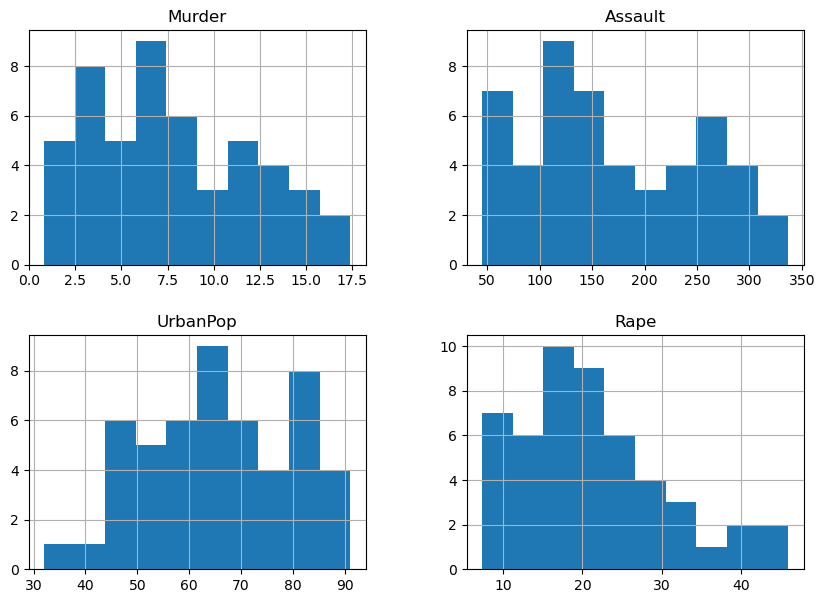

In [53]:
data.hist(figsize=(10,7))

In [54]:
data.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [55]:
# features murder,assault,rape are positively skewed
# feature urbanpon is negatively skewed

In [56]:
data.kurtosis()

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

<AxesSubplot:>

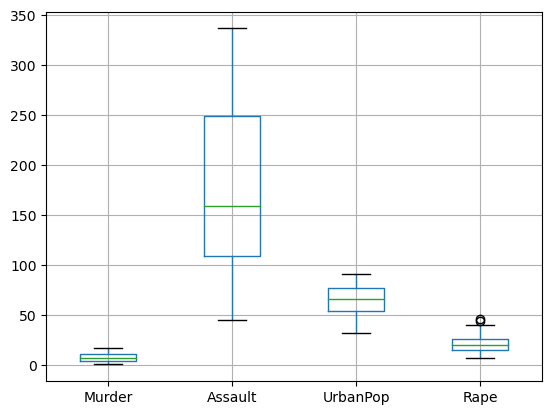

In [57]:
data.boxplot()

In [58]:
# there is outliers in feature rape

Text(0.5, 1.0, 'rape')

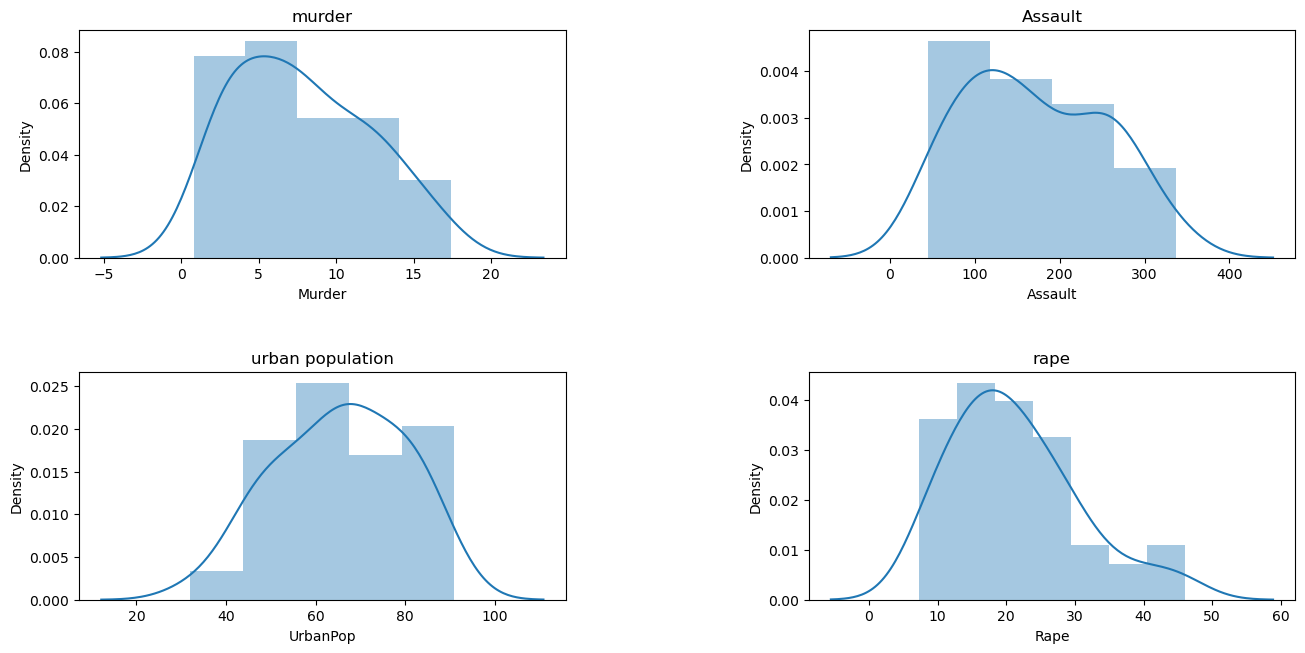

In [59]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,2,1)
sns.distplot(data['Murder'])
plt.title('murder')
plt.subplot(3,2,2)
sns.distplot(data['Assault'])
plt.title('Assault')
plt.subplot(3,2,3)
sns.distplot(data['UrbanPop'])
plt.title('urban population')
plt.subplot(3,2,4)
sns.distplot(data['Rape'])
plt.title('rape')

In [60]:
#correlation analysis

In [61]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


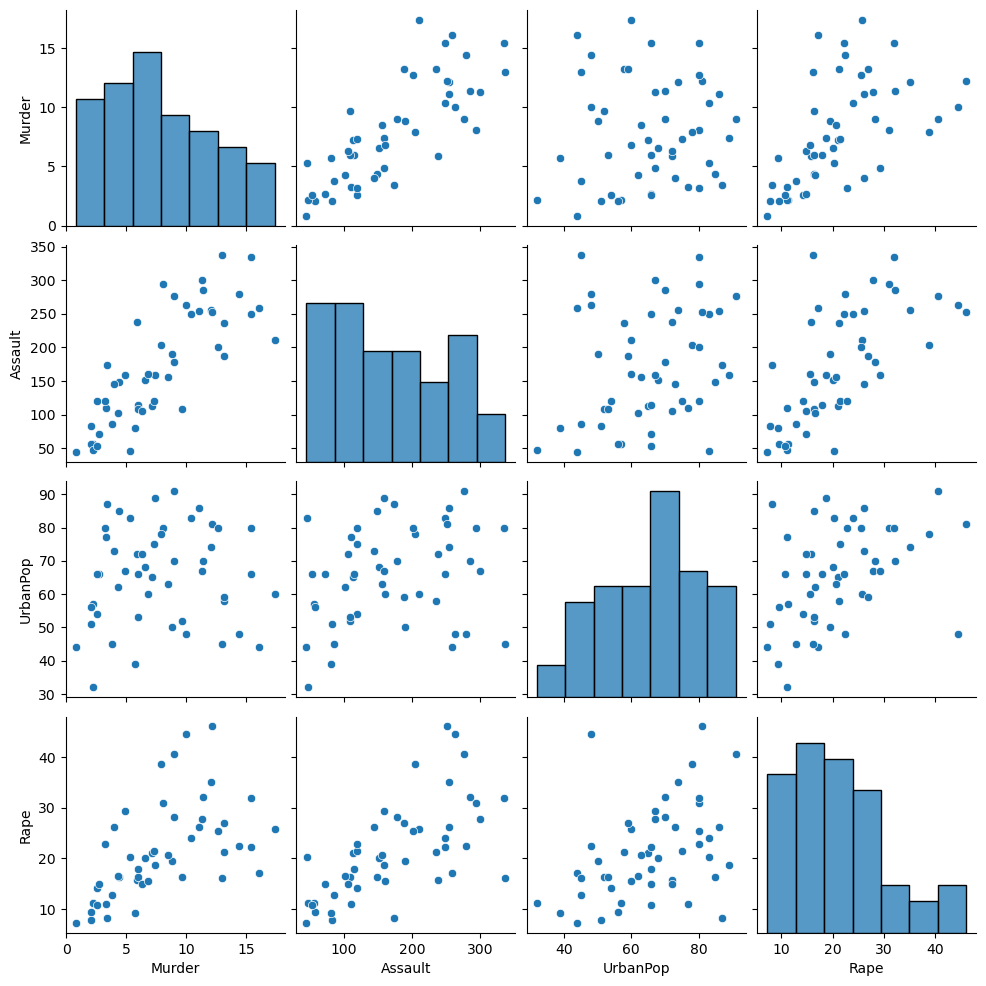

In [62]:
sns.pairplot(data)

In [63]:
# Hierachical clusturing

In [64]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
data_s1=scaler.fit_transform(data.iloc[:,1:])
data_s1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

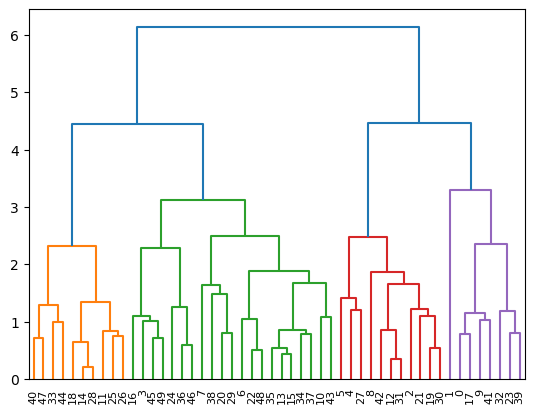

In [66]:
sch=sch.dendrogram(sch.linkage(data_s1,method='complete'))

In [67]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [68]:
pred=hc.fit_predict(data_s1)
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [73]:
data1=pd.DataFrame(data_s1,columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])

In [75]:
data1['Country']=data['Country']
data1['h_clusters']=pred

In [77]:
data1.head(20)

,Murder,Assault,UrbanPop,Rape,Country,h_clusters
0,1.255179,0.790787,-0.526195,-0.003451,Alabama,0
1,0.513019,1.118060,-1.224067,2.509424,Alaska,0
2,0.072361,1.493817,1.009122,1.053466,Arizona,0
3,0.234708,0.233212,-1.084492,-0.186794,Arkansas,1
4,0.281093,1.275635,1.776781,2.088814,California,0
5,0.025976,0.402909,0.869548,1.883901,Colorado,0
6,-1.040880,-0.736484,0.799761,-1.092723,Connecticut,1
7,-0.437875,0.815030,0.450825,-0.585834,Delaware,1
8,1.765415,1.990786,1.009122,1.150530,Florida,0
9,2.229265,0.487757,-0.386621,0.492653,Georgia,0


In [78]:
data1['h_clusters'].value_counts()

1    31
0    19
Name: h_clusters, dtype: int64

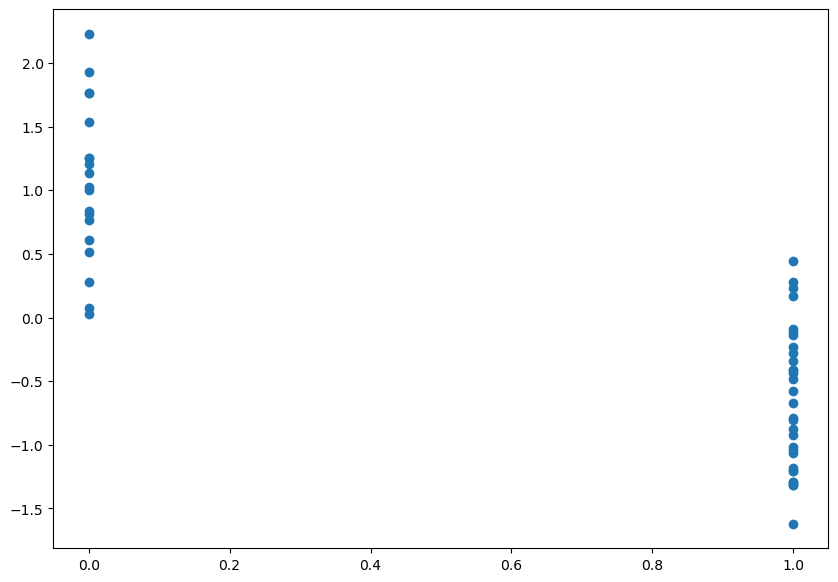

In [79]:
plt.figure(figsize=(10,7))
plt.scatter(data1['h_clusters'],data1['Murder'])

In [108]:
data1.groupby('h_clusters').agg(['mean']).reset_index()

,h_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,1.053771,1.073403,0.193714,0.861041
1,1,-0.645859,-0.657892,-0.118728,-0.527735


# Inference:
# With Hierarchical clustering we got [0,1] i.e., 2 clusters

# KMeans clustering

In [80]:
from sklearn.cluster import KMeans

[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091104, 50.52026552535068, 43.92746404497574, 40.52183461131976, 34.6873883978491, 32.70648136388185, 28.311639397122555]


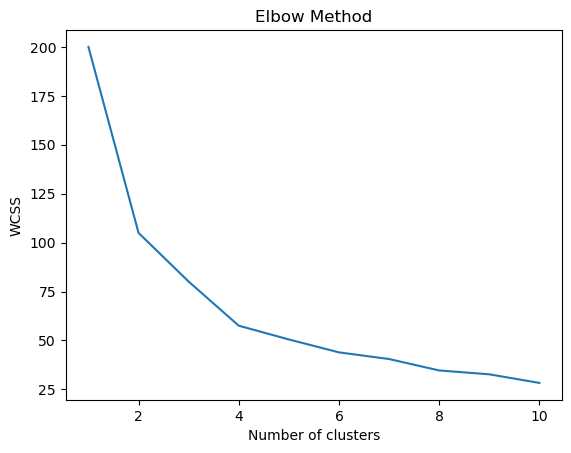

In [81]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(data_s1)
    wcss.append(kmean.inertia_)
    
print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###   k = 4 is the best we can see from elbow plot

In [84]:
kc=KMeans(n_clusters=4,random_state=0)
kc.fit(data_s1)

KMeans(n_clusters=4, random_state=0)

In [85]:
kc.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [86]:
data2=pd.DataFrame(data_s1,columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])

In [88]:
data2['country']=data['Country']
data2['K_clusters']=kc.labels_

In [90]:
data2.head(20)

,Murder,Assault,UrbanPop,Rape,country,K_clusters
0,1.255179,0.790787,-0.526195,-0.003451,Alabama,3
1,0.513019,1.118060,-1.224067,2.509424,Alaska,1
2,0.072361,1.493817,1.009122,1.053466,Arizona,1
3,0.234708,0.233212,-1.084492,-0.186794,Arkansas,3
4,0.281093,1.275635,1.776781,2.088814,California,1
5,0.025976,0.402909,0.869548,1.883901,Colorado,1
6,-1.040880,-0.736484,0.799761,-1.092723,Connecticut,0
7,-0.437875,0.815030,0.450825,-0.585834,Delaware,0
8,1.765415,1.990786,1.009122,1.150530,Florida,1
9,2.229265,0.487757,-0.386621,0.492653,Georgia,3


In [92]:
data2['K_clusters'].value_counts()

0    16
1    13
2    13
3     8
Name: K_clusters, dtype: int64

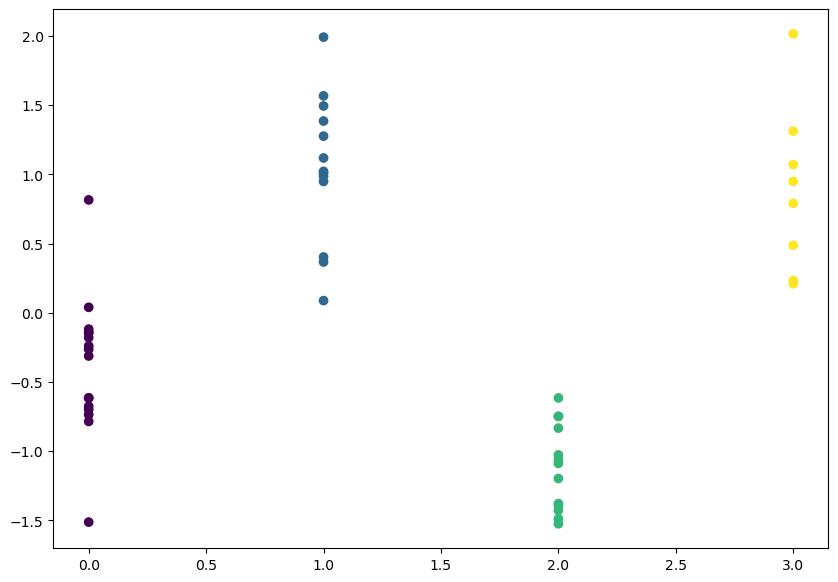

In [91]:
plt.figure(figsize=(10,7))
plt.scatter(data2['K_clusters'],data2['Assault'],c=kc.labels_)

In [107]:
data2.groupby('K_clusters').agg(['mean']).reset_index()

,K_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,-0.494407,-0.386484,0.581676,-0.264310
1,1,0.702127,1.049994,0.729974,1.289904
2,2,-0.971303,-1.117836,-0.939550,-0.976578
3,3,1.426224,0.883211,-0.822791,0.019467


### With KMeans clustering we got [0,1,2,3] i.e., 4 clusters

In [93]:
from sklearn.cluster import DBSCAN

In [95]:
#as we decrease eps, more outliers are formed as radius decreases.
db=DBSCAN(eps=1.2,min_samples=5)
db.fit(data_s1)

DBSCAN(eps=1.2)

In [96]:
data3=pd.DataFrame(data_s1,columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])

In [97]:
data3['DBS_clusters']=db.labels_

In [99]:
data3.head(20)

,Murder,Assault,UrbanPop,Rape,DBS_clusters
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,1
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,-1
6,-1.040880,-0.736484,0.799761,-1.092723,1
7,-0.437875,0.815030,0.450825,-0.585834,1
8,1.765415,1.990786,1.009122,1.150530,-1
9,2.229265,0.487757,-0.386621,0.492653,0


In [100]:
data3['DBS_clusters'].value_counts()

 1    32
-1    13
 0     5
Name: DBS_clusters, dtype: int64

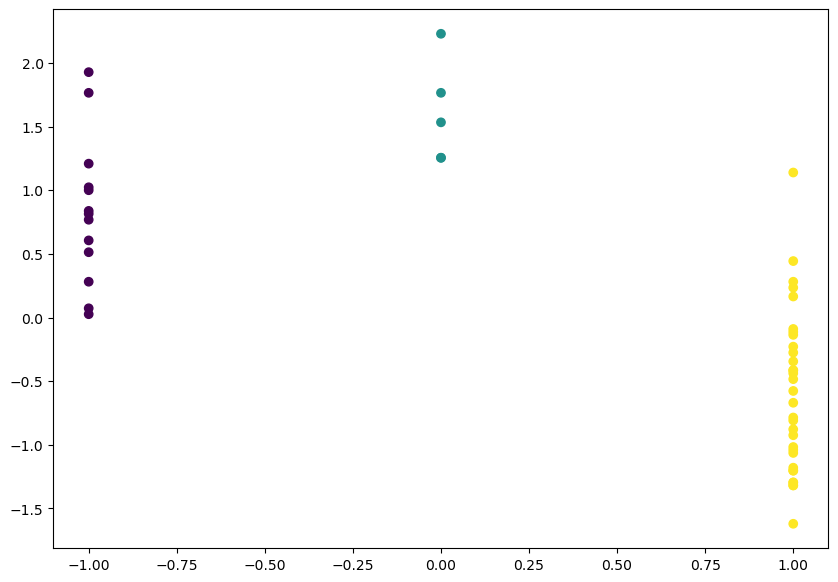

In [104]:
plt.figure(figsize=(10,7))
plt.scatter(data3['DBS_clusters'],data3['Murder'],c=db.labels_)

In [106]:
data3.groupby('DBS_clusters').agg(['mean']).reset_index()

,DBS_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,0.834146,1.252325,0.402511,1.119835
1,0,1.607706,0.749575,-0.512238,0.268328
2,1,-0.590076,-0.625878,-0.083483,-0.496859


In [109]:
data3[data3['DBS_clusters']==-1]

,Murder,Assault,UrbanPop,Rape,DBS_clusters
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,-1
8,1.765415,1.990786,1.009122,1.150530,-1
12,0.605789,0.948363,1.218484,0.298525,-1
19,0.814521,1.566544,0.101889,0.708350,-1
21,1.000062,1.021090,0.590399,1.495646,-1
23,1.927762,1.069575,-1.503215,-0.445631,-1
27,1.023254,0.984726,1.078909,2.671197,-1


In [110]:
data3[data3['DBS_clusters']==-1].shape

(13, 5)

In [ ]:
#We can see 13 observations/ datapoints fall into cluster-1 which are outliers